It took 0.99 seconds to process gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/California Crimes.csv, which contains with 470 rows.
It took 0.94 seconds to process gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/data_sample.csv, which contains with 10000 rows.
It took 0.79 seconds to process gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/greenhouse-gas-emissions-per-kilogram-of-food-product.csv, which contains with 38 rows.
It took 0.90 seconds to process gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/religion_analysis_results-2.csv, which contains with 506 rows.
It took 0.92 seconds to process gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/purchase_order.csv, which contains with 3 rows.


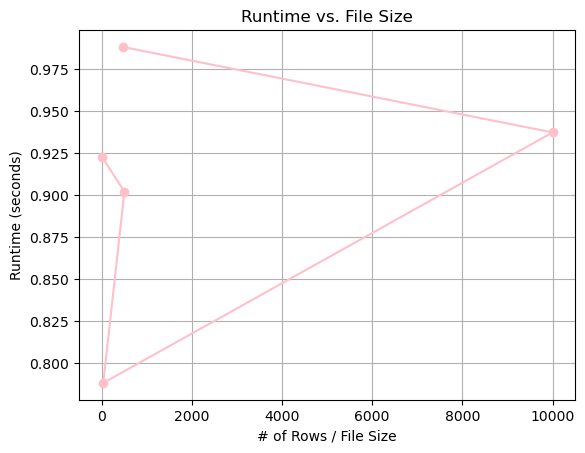

In [30]:
import time
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
#Spark Session
spark = SparkSession.builder.appName("SparkPerformanceTest").getOrCreate()

#Paths to the CSV files
data_paths = [
    "gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/California Crimes.csv",
    "gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/data_sample.csv",
    "gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/greenhouse-gas-emissions-per-kilogram-of-food-product.csv",
    "gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/religion_analysis_results-2.csv",
    "gs://dataproc-staging-us-central1-52448029597-wqkia201/notebooks/jupyter/purchase_order.csv"
]

#Store runtimes and file sizes
run_times = []
file_sizes = []

#Find runtime of files
for path in data_paths:
    start = time.time()  
    #create dataframe 
    df = spark.read.csv(path, header=True, inferSchema=True)
    #count rows within dataframe
    num_rows = df.count()
    file_sizes.append(num_rows)  
    df.count() 
    done = time.time() 
    run_times.append(done - start)  
    
    print(f"It took {done - start:.2f} seconds to process {path}, which contains with {num_rows} rows.")

#Plot the runtimes vs file size
plt.plot(file_sizes, run_times, marker='o', color='pink') 
plt.xlabel("# of Rows / File Size") 
plt.ylabel("Runtime (seconds)") 
plt.title("Runtime vs. File Size") 
plt.grid(True) 
plt.show()
